<a href="https://colab.research.google.com/github/ridhimapm/CIS5930-Programming-Project-SVM-/blob/main/svm1b_CvaluePlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import cvxopt as cvx
import matplotlib.pyplot as plt
import random

In [30]:

def generate_linear_separable_data(n):
    # generate training data in the 2-d case
    random.seed(47405)
    mean1 = np.array([1, 1])
    mean2 = np.array([-1, -1])
    cov = np.array([[1, 0.25], [0.25, 1]])
    X1 = np.random.multivariate_normal(mean1, cov, 200)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 200)
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

def generate_non_linear_separable_data(n):
    mean1 = [-1, 2]
    mean2 = [1, -1]
    mean3 = [4, -4]
    mean4 = [-4, 4]
    cov = [[1.0,0.8], [0.8, 1.0]]
    X1 = np.random.multivariate_normal(mean1, cov, n//4)
    X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, n//4)))
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 50)
    X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, n//4)))
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2




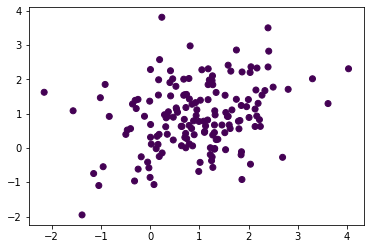

In [31]:
d = 2 # dimession
n = 200 # total samples
p = .2 # test fraction
n_test = int(p * n) # number of training samples
n_train = n - n_test # number of test samples 

X1, y1, X2, y2 = generate_linear_separable_data(n)

prmt = np.random.permutation(n)
X = np.vstack([X1, X2])[prmt]
y = np.concatenate([y1, y2])[prmt]

X_test = X[:n_test]
y_test = y[:n_test]
X_train = X[n_test:]
y_train = y[n_test:]

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

In [32]:
C = 1.
P = np.zeros((d + 1 + n_train, d + 1 + n_train))
P[:d, :d] = np.eye(d)
P = cvx.matrix(P)

q = C * np.concatenate((np.zeros(d + 1), np.ones(n_train)))
q = cvx.matrix(q)

G = np.zeros((n_train + n_train, d + 1 + n_train))
G[:n_train, :d] = -np.diag(y_train) @ X_train
G[:n_train, d] = -y_train
G[:n_train, -n_train:] = -np.eye(n_train)
G[n_train:, -n_train:] = -np.eye(n_train)
G = cvx.matrix(G)

h = np.concatenate((-np.ones(n_train), np.zeros(n_train)))
h = cvx.matrix(h)


solution = cvx.solvers.qp(P, q, G, h)

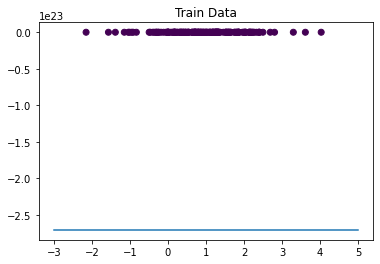

In [33]:
w = np.array(solution['x'][:2])
b = np.array(solution['x'][2])

x1 = np.linspace(-3, 5, 100)
x2 = (-w[0] * x1 - b) / w[1]
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot(x1, x2)
plt.title('Train Data')
plt.show()

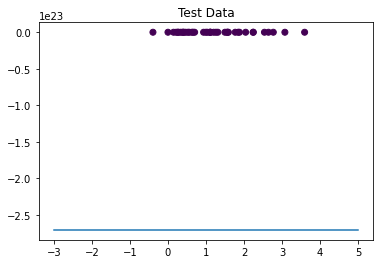

In [34]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.plot(x1, x2)
plt.title('Test Data')
plt.show()

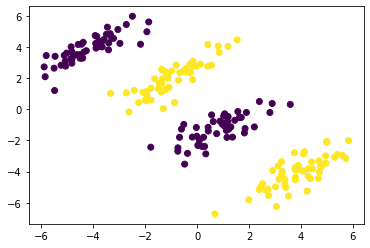

In [35]:
n = 200
p = .2
n_test = int(p * n) 
n_train = n - n_test 

X1, y1, X2, y2 = generate_non_linear_separable_data(n)

prmt = np.random.permutation(n)
X = np.vstack([X1, X2])[prmt]
y = np.concatenate([y1, y2])[prmt]

X_test = X[:n_test]
y_test = y[:n_test]
X_train = X[n_test:]
y_train = y[n_test:]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

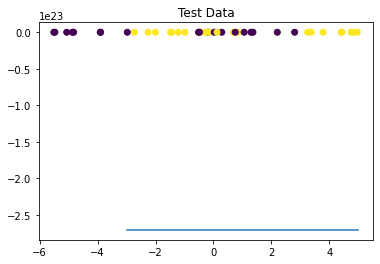

In [36]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.plot(x1, x2)
plt.title('Test Data')
plt.show()

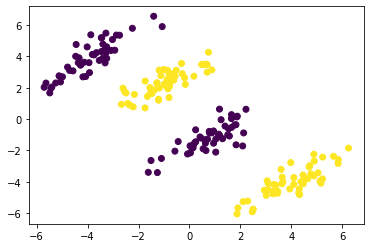

In [37]:
n = 200
p = .2
n_test = int(p * n) 
n_train = n - n_test 

X1, y1, X2, y2 = generate_non_linear_separable_data(n)

prmt = np.random.permutation(n)
X = np.vstack([X1, X2])[prmt]
y = np.concatenate([y1, y2])[prmt]

X_test = X[:n_test]
y_test = y[:n_test]
X_train = X[n_test:]
y_train = y[n_test:]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [39]:
cvx.solvers.options['show_progress'] = False
def rbf(x1, x2, gamma):
    x = x1 - x2
    return np.exp(-gamma * np.dot(x, x))


Cs = [1e-2, 1e-1, .5, 1]
gammas = [10, 50, 100, 500]

train_acc = []
test_acc = []
y_hats_train = []
y_hats_test = []
for C in Cs:
    train_acc_C = []
    test_acc_C = []
    y_hat_train_C = []
    y_hat_test_C = []
    for gamma in gammas:
        K = np.zeros((n_train, n_train))
        for i in range(n_train):
            for j in range(n_train):
                K[i, j] = rbf(X_train[i], X_train[j], gamma=gamma)

        P = np.diag(y_train) @ K @ np.diag(y_train)
        P = cvx.matrix(P)

        q = -np.ones(n_train)
        q = cvx.matrix(q)

        G = np.vstack((np.eye(n_train), -np.eye(n_train)))
        G = cvx.matrix(G)

        h = np.concatenate((C * np.ones(n_train), np.zeros(n_train)))
        h = cvx.matrix(h)

        A = cvx.matrix(y_train.reshape((1, -1)))
        b = cvx.matrix(0.0)
        cvx.solvers.options['show_progress'] = False
        solution = cvx.solvers.qp(P, q, G, h, A, b);
        
        alpha = np.array(solution['x']).flatten()
        support = alpha > 1e-6

        b = np.mean(
            [
                np.sum(
                    [
                        alpha[j] * y_train[j] * K[i, j] for j in  range(n_train)
                    ]
                ) - y_train[i] for i in range(n_train) if support[i]
            ]
        )
        predict = lambda x: np.sign(np.sum(
            [
                alpha[j] * y_train[j] * rbf(X_train[j], x, gamma=gamma) for j in  range(n_train)
            ]
        ) - b).item()
        
        y_hat_train = np.array([predict(x) for x in X_train])
        y_hat_test = np.array([predict(x) for x in X_test])
        y_hat_train_C.append(y_hat_train)
        y_hat_test_C.append(y_hat_test)
        train_acc_C.append(np.count_nonzero(y_train == y_hat_train) / n_train)
        test_acc_C.append(np.count_nonzero(y_test == y_hat_test) / n_test)
    y_hats_train.append(y_hat_train_C)
    y_hats_test.append(y_hat_test_C)
    train_acc.append(train_acc_C)
    test_acc.append(test_acc_C)

In [40]:
print('Train Accuracy:')
print('{:8}|'.format('Gamma:'), '{:10}{:10}{:10}{:10}'.format(*gammas))
print('_'*50)
[print('C = {:4}|'.format(c), '{:10}{:10}{:10}{:10}'.format(*train_acc[i])) for i, c in enumerate(Cs)];

Train Accuracy:
Gamma:  |         10        50       100       500
__________________________________________________
C = 0.01|        1.0       1.0       1.0       1.0
C =  0.1|        1.0       1.0       1.0       1.0
C =  0.5|        1.0       1.0       1.0       1.0
C =    1|        1.0       1.0       1.0       1.0


In [41]:
print('Test Accuracy:')
print('{:8}|'.format('Gamma:'), '{:10}{:10}{:10}{:10}'.format(*gammas))
print('_'*50)
[print('C = {:4}|'.format(c), '{:10}{:10}{:10}{:10}'.format(*test_acc[i])) for i, c in enumerate(Cs)];

Test Accuracy:
Gamma:  |         10        50       100       500
__________________________________________________
C = 0.01|      0.975      0.85     0.925       0.6
C =  0.1|      0.975      0.85     0.925       0.6
C =  0.5|      0.975      0.85       0.9       0.6
C =    1|      0.975      0.85     0.775       0.6


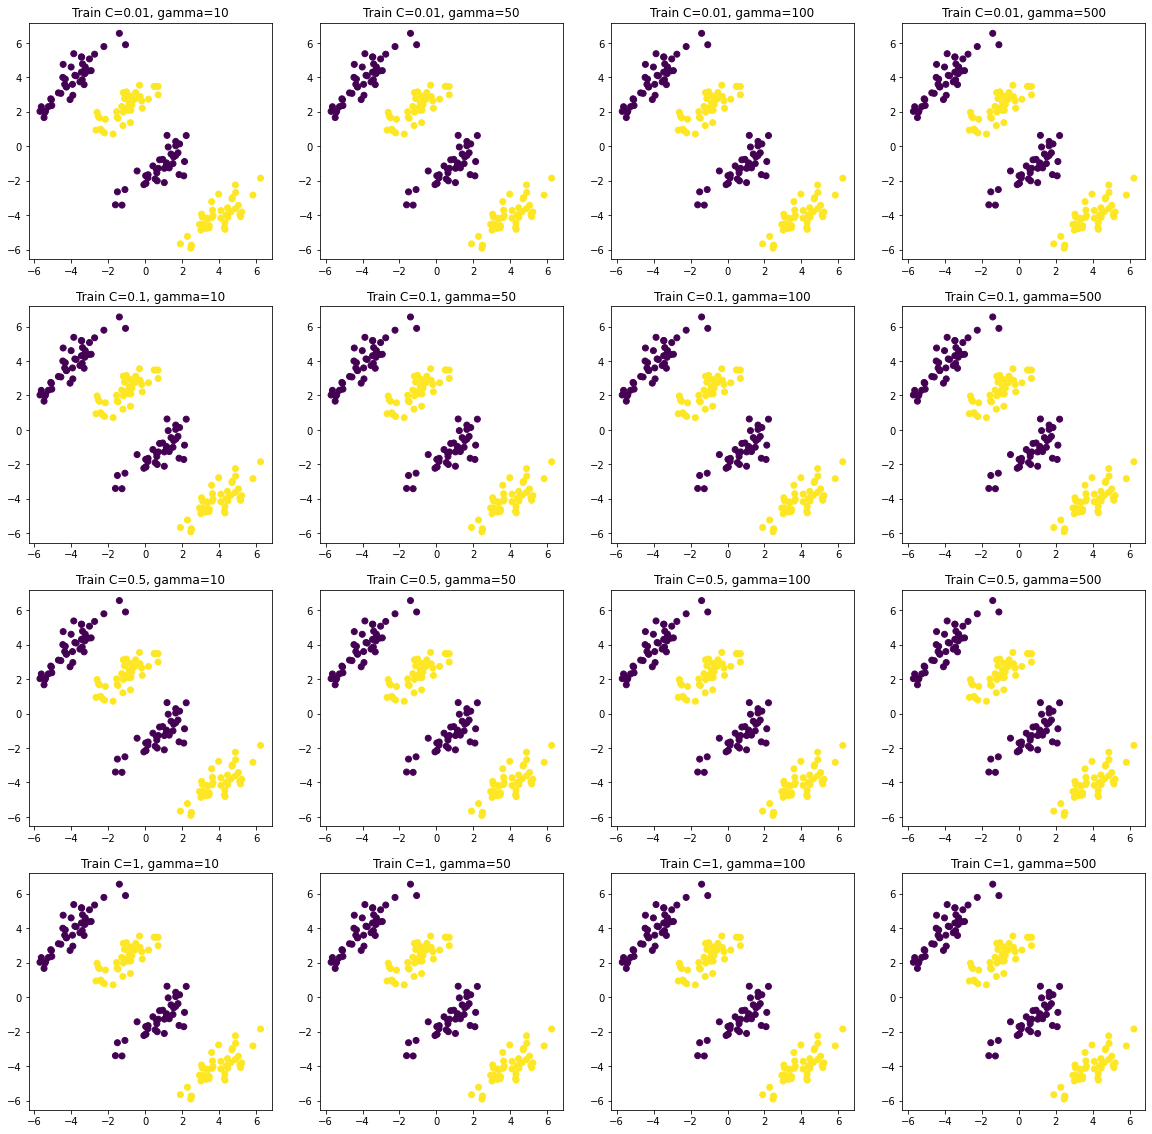

In [42]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(len(Cs), len(gammas))

for i , c in enumerate(Cs):
    for j, gamma in enumerate(gammas):
        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_hats_train[i][j])
        ax[i, j].set_title('Train C={}, gamma={}'.format(c, gamma))
plt.plot();

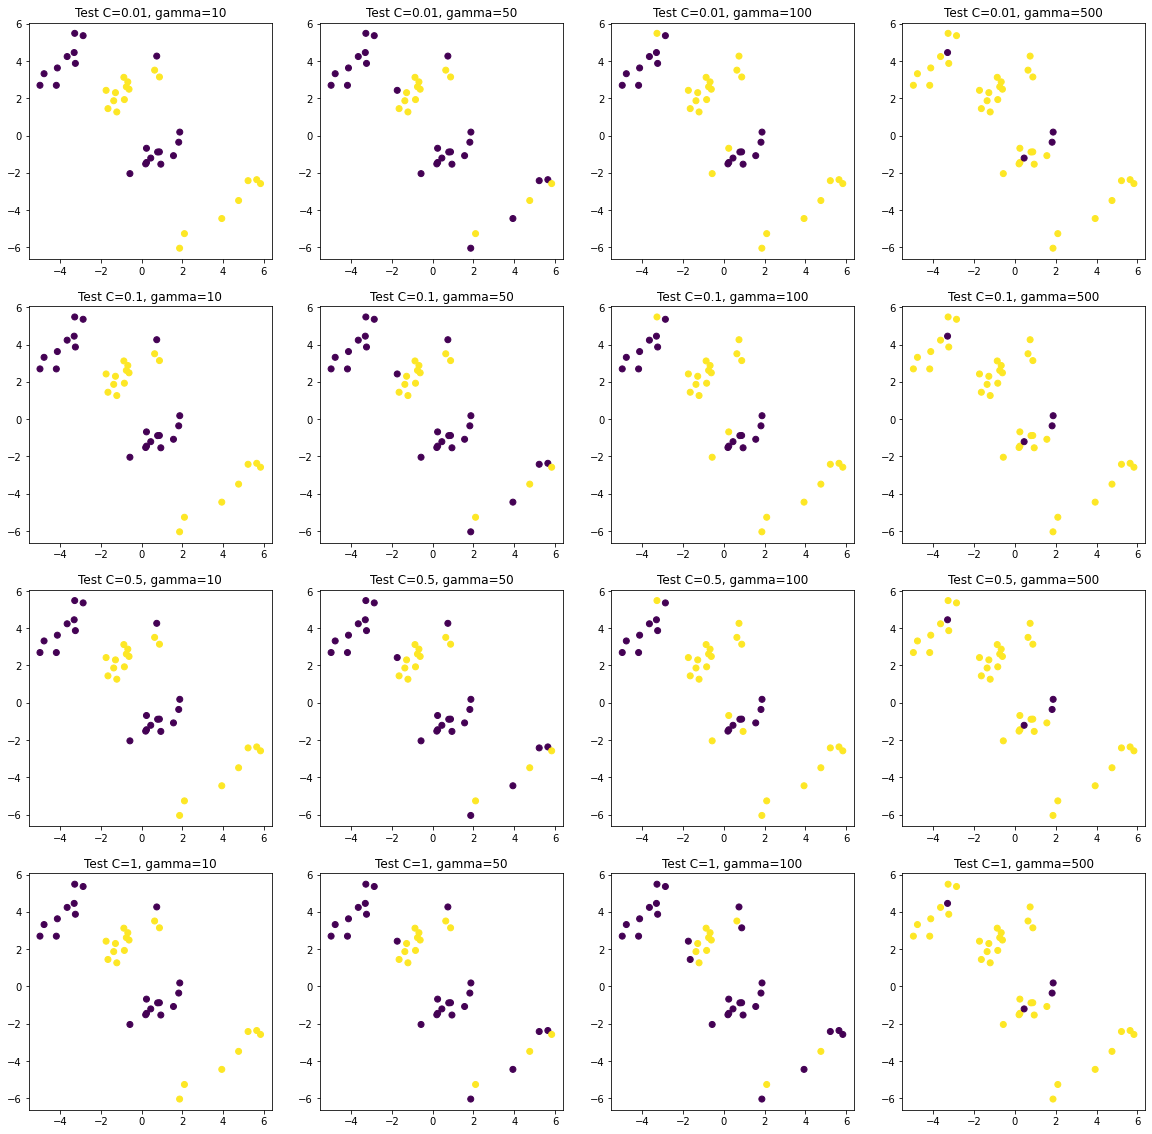

In [43]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(len(Cs), len(gammas))

for i , c in enumerate(Cs):
    for j, gamma in enumerate(gammas):
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_hats_test[i][j])
        ax[i, j].set_title('Test C={}, gamma={}'.format(c, gamma))
plt.plot();